### Database Juliana Marins

#### Pré processamento

In [118]:
import spacy
import nltk
from spacy.matcher import Matcher
from spacy.util import filter_spans

nltk.download('stopwords')

# Carrega modelo e stopwords
nlp = spacy.load('pt_core_news_lg')
stopwords = set(nltk.corpus.stopwords.words('portuguese'))

# Matcher para padrões como "20 mil pessoas" e datas
matcher = Matcher(nlp.vocab)
padrao_cardinal_substantivo = [
    {"LIKE_NUM": True},
    {"LOWER": {"IN": ["mil", "milhão", "milhões", "bilhão", "bilhões"]}, "OP": "?"},
    {"LOWER": "de", "OP": "?"},
    {"POS": "NOUN"}
]
padrao_num_extenso = [
    {"POS": "NUM"},
    {"LOWER": "de", "OP": "?"},
    {"POS": "NOUN"}
]
padrao_ordinal = [
    {"TAG": "ORD"},
    {"LOWER": "de", "OP": "?"},
    {"POS": "NOUN"}
]
matcher.add("NUM_UNIDADE", [padrao_cardinal_substantivo, padrao_num_extenso, padrao_ordinal])

def pre_processamento_ent_numeros(texto):
    doc = nlp(texto)

    # Identifica spans compostos (ex: "vinte mil pessoas")
    matches = matcher(doc)
    spans = [doc[start:end] for _, start, end in matches]
    spans_filtrados = filter_spans(spans)

    # Mapeia início do span -> span para evitar tokenização duplicada
    spans_dict = {span.start: span for span in spans_filtrados}
    ent_by_start = {ent.start: ent for ent in doc.ents}

    tokens = []
    i = 0
    while i < len(doc):
        if i in spans_dict:
            span = spans_dict[i]
            span_text = span.text
            if span_text.lower() not in stopwords:
                tokens.append(span_text)
            i = span.end
        elif i in ent_by_start:
            ent = ent_by_start[i]
            ent_text = ent.text
            if ent_text.lower() not in stopwords:
                tokens.append(ent_text)
            i = ent.end
        else:
            token = doc[i]
            if token.is_alpha and token.text.lower() not in stopwords:
                tokens.append(token.text)
            i += 1
        
        
        tokens_unicos = list(dict.fromkeys(tokens))
    return tokens_unicos

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\luiza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
import re

def concordance_termo(texto, termo, largura=40, case_sensitive=False):
    if not case_sensitive:
        texto_proc = texto.lower()
        termo_proc = termo.lower()
    else:
        texto_proc = texto
        termo_proc = termo

    ocorrencias = [m.start() for m in re.finditer(re.escape(termo_proc), texto_proc)]
    resultados = []

    for i in ocorrencias:
        inicio = max(0, i - largura)
        fim = min(len(texto), i + len(termo) + largura)

        esquerda = texto[inicio:i].replace('\n', ' ')
        centro = texto[i:i+len(termo)]
        direita = texto[i+len(termo):fim].replace('\n', ' ')

        # Calcula quantos espaços são necessários para alinhar o termo na coluna `largura`
        padding = largura - len(esquerda)
        padding = max(0, padding)

        linha = f"{' ' * padding}{esquerda}{centro}{direita}"
        resultados.append(linha)

    return resultados


#### Análise por notícia - Resgate

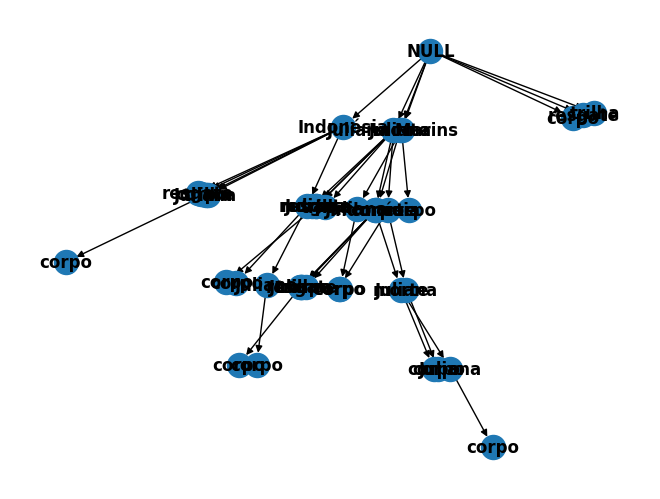

In [136]:
from trieofrules import trieofrules
import csv
import re

valores_coluna = []

with open('datasets/database_juliana_marins - morte_confirmada.csv', encoding='utf-8') as f:
    reader = csv.DictReader(f)
    for line in reader:
      texto = line['Texto']
      paragrafos = texto.split('\n')  
      paragrafos = [p.strip() for p in paragrafos if p.strip()]
      #valores_coluna.extend(paragrafos) #por paragrafo
      valores_coluna.append(line['Texto']) #noticia inteira
      
valores = []
for texto in valores_coluna:
      result = pre_processamento_ent_numeros(texto)
      valores.append(result)

#supported algorithms: FP-max, FP-growth, Apriori
TOR_manifest = trieofrules(data = valores, alg='Apriori', min_support=0.819) 
TOR_manifest.draw()
TOR_manifest.save_graph(filename = 'outputs/resgate_juliana_marins.graphml') 

#### Análise por notícia - Morte confirmada

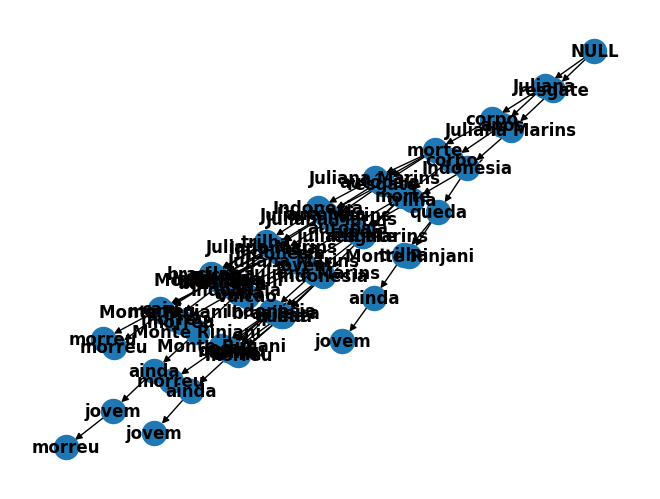

In [15]:
from trieofrules import trieofrules
import csv
import re

valores_coluna = []

with open('datasets/database_juliana_marins - morte_confirmada.csv', encoding='utf-8') as f:
    reader = csv.DictReader(f)
    for line in reader:
      valores_coluna.append(line['Texto'])
      
valores = []
for texto in valores_coluna:
      result = pre_processamento_ent_numeros(texto)
      valores.append(result)

#supported algorithms: FP-max, FP-growth, Apriori
TOR_manifest = trieofrules(data = valores, alg='FP-max', min_support=0.55) 
TOR_manifest.draw()
TOR_manifest.save_graph(filename = 'outputs/morte_juliana_marins.graphml') 

In [26]:
txt = " ".join(valores_coluna).lower()

#resultados = concordance_termo(txt, "jair bolsonaro", largura=40)
resultados = concordance_termo(txt, "resgate", largura=40)

print(len(resultados))
for r in resultados:
    print(r)


52
ha de vulcão na indonésia e aguarda por resgate  uma equipe de socorristas conseguiu en
do ser resgatada há quase 24 horas.  “o resgate conseguiu descer até ela, deram comida,
asileira em jacarta está dando apoio ao resgate, segundo a família. a embaixada da indo
 mostra a suposta chegada de uma equipe resgate até a brasileira juliana marins, 26 ano
de que a jovem foi vista pela equipe de resgate e o grupo tentou chegar até ela, mas nã
estamos em contato direto com o time de resgate e recebendo atualizaçãoes. assim que po
, mas os indonésios estão empenhados no resgate. embaixada segue acompanhando operação"
ncias das autoridades locais para que o resgate da brasileira seja realizado com urgênc
to a situação", afirmou.  uma equipe de resgate conseguiu localizar a brasileira julian
cebeu água e suprimentos pela equipe de resgate, mas essa informação foi desmentida pos
isas e escorregadias, o que dificulta o resgate.  segundo mariana marins, irmã de julia
do ser resgatada há quase 24 